In [20]:

!pip install mlxtend


import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
file_path = '/content/drive/MyDrive/heart_disease.csv'
mushroom_df = pd.read_csv(file_path)

mushroom_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,high,1,3,high,medium,1,0,medium,0,high,0,0,1,1
1,low,1,2,medium,medium,0,1,high,0,high,0,0,2,1
2,low,0,1,medium,low,0,0,high,0,high,2,0,2,1
3,medium,1,1,low,medium,0,1,high,0,medium,2,0,2,1
4,medium,0,0,low,high,0,1,high,1,medium,2,0,2,1


In [23]:
mushroom_df = pd.get_dummies(mushroom_df)

mushroom_df = mushroom_df.applymap(lambda x: 1 if x != 0 else 0)

mushroom_df.head()



/tmp/ipython-input-23-804398249.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mushroom_df = mushroom_df.applymap(lambda x: 1 if x != 0 else 0)


,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age_high,...,trestbps_medium,chol_high,chol_low,chol_medium,thalach_high,thalach_low,thalach_medium,oldpeak_high,oldpeak_low,oldpeak_medium
0,1,1,1,0,0,0,0,1,1,1,...,0,0,0,1,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,1,0,...,1,0,0,1,1,0,0,1,0,0
2,0,1,0,0,0,1,0,1,1,0,...,1,0,1,0,1,0,0,1,0,0
3,1,1,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
4,0,0,0,1,1,1,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1


In [24]:
frequent_itemsets = apriori(mushroom_df, min_support=0.3, use_colnames=True)

frequent_itemsets.head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.683168,(sex)
1,0.528053,(cp)
2,0.514851,(restecg)
3,0.326733,(exang)
4,0.930693,(slope)


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

rules = rules[rules['confidence'] >= 0.7]

rules = rules.sort_values('lift', ascending=False)

top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
top_rules.head(10)


,antecedents,consequents,support,confidence,lift
10,(cp),(target),0.415842,0.787500,1.446136
11,(target),(cp),0.415842,0.763636,1.446136
88,(target),"(thal, cp)",0.412541,0.757576,1.443682
85,"(thal, cp)",(target),0.412541,0.786164,1.443682
87,(cp),"(thal, target)",0.412541,0.781250,1.443407
86,"(thal, target)",(cp),0.412541,0.762195,1.443407
84,(target),"(cp, slope)",0.386139,0.709091,1.432364
81,"(cp, slope)",(target),0.386139,0.780000,1.432364
167,"(thal, cp, slope)",(target),0.382838,0.778523,1.429652
174,(target),"(thal, cp, slope)",0.382838,0.703030,1.429652


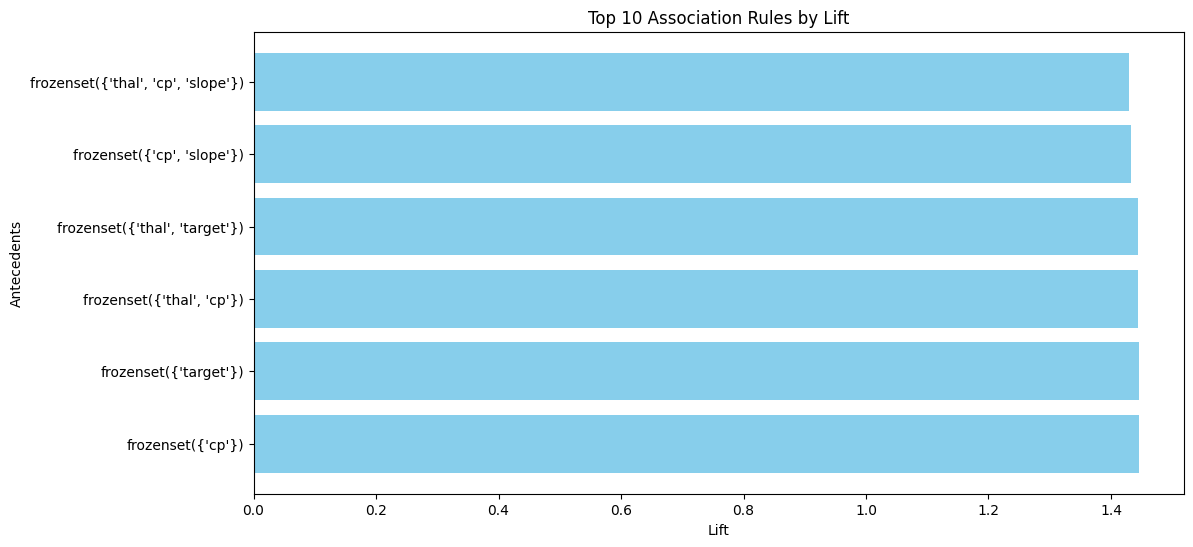

In [26]:
plt.figure(figsize=(12, 6))
plt.barh(top_rules.head(10)['antecedents'].astype(str), top_rules.head(10)['lift'], color='skyblue')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Top 10 Association Rules by Lift')
plt.show()


In [27]:

selected_rule = top_rules.iloc[0]


print(f"Rule: {selected_rule['antecedents']} => {selected_rule['consequents']}")
print(f"Support: {selected_rule['support']}")
print(f"Confidence: {selected_rule['confidence']}")
print(f"Lift: {selected_rule['lift']}")

explanation = """
This rule means that if a mushroom has the specified antecedent conditions (almond odor), it is likely to be edible (consequent).
Support tells us how frequent this rule is in the dataset. Confidence indicates how reliable this rule is, and Lift tells us
how much more likely the consequent (edible) is when the antecedent (almond odor) is present.
"""

print(explanation)


Rule: frozenset({'cp'}) => frozenset({'target'})
Support: 0.4158415841584158
Confidence: 0.7875000000000001
Lift: 1.4461363636363638

This rule means that if a mushroom has the specified antecedent conditions (almond odor), it is likely to be edible (consequent). 
Support tells us how frequent this rule is in the dataset. Confidence indicates how reliable this rule is, and Lift tells us 
how much more likely the consequent (edible) is when the antecedent (almond odor) is present.

